<a href="https://colab.research.google.com/github/nerovalerius/convolution/blob/main/Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np 
import cv2
from matplotlib import pyplot as plt 
from skimage.util import random_noise
import urllib

In [25]:
def show_img(img,title):
  plt.imshow(img,cmap='Greys_r')
  plt.title(title)
  plt.show()
  

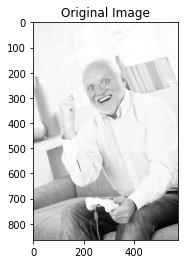

In [26]:
img = cv2.imread('harold_original.jpg',cv2.IMREAD_GRAYSCALE)
show_img(img,"Original Image")


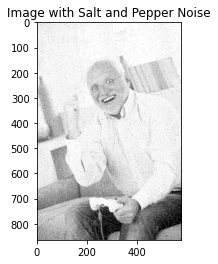

In [27]:
img_noise = random_noise(img, mode='s&p')
# img_noise pixel values are in range(0,1) and I have to convert it to range(0,255)
# Convert it
img_noise = 255*img_noise
img_noise = img_noise.astype('uint8')
# Show the image
show_img(img_noise,"Image with Salt and Pepper Noise")

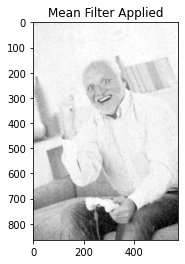

In [28]:
# Apply mean filter
ker_size = 5
norm_fac = ker_size ** 2
kernel = np.ones((ker_size,ker_size),np.uint8)/norm_fac
img_filtered_avg = cv2.filter2D(img_noise,-1,kernel)
# when ddepth=-1, the output image will have the same depth as the source.
show_img(img_filtered_avg,"Mean Filter Applied")

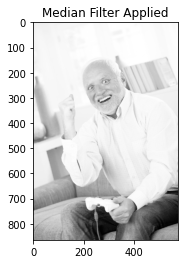

In [29]:
# Applying the median filter
median_filtered = cv2.medianBlur(img_noise,3)
# Second argument is the kernel size.
show_img(median_filtered,"Median Filter Applied")

# Sobel Edge Detection : 


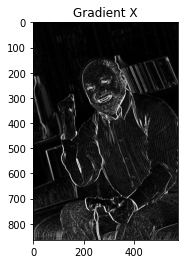

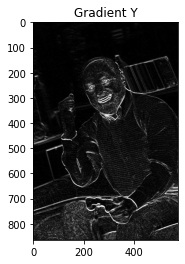

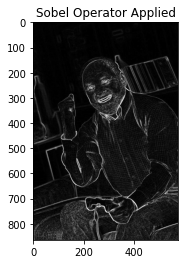

In [30]:
Gx = cv2.Sobel(img,cv2.CV_16S,1,0)  
Gy = cv2.Sobel(img,cv2.CV_16S,0,1)  
abs_x = cv2.convertScaleAbs(Gx) 
abs_y = cv2.convertScaleAbs(Gy)
dst = cv2.addWeighted(abs_x,0.5,abs_y,0.5,0)  
show_img(abs_x,"Gradient X")
show_img(abs_y,"Gradient Y")
show_img(dst,"Sobel Operator Applied")